In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#read select rows from file 
num = 1037340 - 778005 + 1
filename = os.path.join(os.getcwd(), "/Users/vanessali/Documents/Break Through Tech AI/Machine Learning/Project/archive", "fraudTrain.csv")
df = pd.read_csv(filename, header=0, skiprows=range(1, 778006), nrows= num)

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,778005,2019-11-29 19:37:13,2383461948823908,fraud_Langworth LLC,personal_care,126.94,Patrick,Vaughan,M,651 Miller Common,...,43.7450,-70.9092,1892,Audiological scientist,1956-03-02,f0225e06bf2755d8437f0834a111bbb0,1354217833,43.609006,-71.762803,0
1,778006,2019-11-29 19:37:14,30407675418785,fraud_Pouros-Conroy,shopping_pos,1.34,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,b5973ae880ef9ecde4058105f722d86d,1354217834,41.265242,-75.761824,0
2,778007,2019-11-29 19:37:51,4841313716651064,fraud_Gottlieb Group,kids_pets,46.04,Omar,Gay,M,2161 Blankenship Freeway,...,43.7185,-72.4439,140,"Development worker, community",1989-10-28,707e89b8abaf7c0f12109b7948d09b3b,1354217871,43.175244,-71.459067,0
3,778008,2019-11-29 19:39:01,3566875419572867,"fraud_Goyette, Howell and Collier",shopping_pos,148.31,Adam,Mcdonald,M,997 Cameron Meadow Apt. 980,...,44.6400,-73.3113,1654,Transport planner,1991-01-31,984bc7ebdf0c2ed659bd46a66f375adb,1354217941,44.327507,-74.294506,0
4,778009,2019-11-29 19:39:24,4003989662068504,fraud_Mohr Inc,shopping_pos,8.56,Chris,White,M,98897 Bennett Lodge,...,33.3224,-86.9657,71463,Radio broadcast assistant,1989-02-08,3412353681fe2aaabcd3f3fc1017f122,1354217964,33.552678,-87.544787,0


In [2]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [3]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [4]:
df.isnull().any()

Unnamed: 0               False
trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                      False
first                    False
last                     False
gender                   False
street                   False
city                     False
state                    False
zip                      False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
trans_num                False
unix_time                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

In [5]:
#number of unique categories
df['category'].nunique()

14

In [6]:
df = pd.get_dummies(df, columns=['category'])
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,778005,2019-11-29 19:37:13,2383461948823908,fraud_Langworth LLC,126.94,Patrick,Vaughan,M,651 Miller Common,Parsonsfield,...,0,0,0,0,0,0,1,0,0,0
1,778006,2019-11-29 19:37:14,30407675418785,fraud_Pouros-Conroy,1.34,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,...,0,0,0,0,0,0,0,0,1,0
2,778007,2019-11-29 19:37:51,4841313716651064,fraud_Gottlieb Group,46.04,Omar,Gay,M,2161 Blankenship Freeway,West Hartford,...,0,0,0,1,0,0,0,0,0,0
3,778008,2019-11-29 19:39:01,3566875419572867,"fraud_Goyette, Howell and Collier",148.31,Adam,Mcdonald,M,997 Cameron Meadow Apt. 980,South Hero,...,0,0,0,0,0,0,0,0,1,0
4,778009,2019-11-29 19:39:24,4003989662068504,fraud_Mohr Inc,8.56,Chris,White,M,98897 Bennett Lodge,Bessemer,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259331,1037336,2020-03-06 07:13:59,3500969075198072,fraud_Kutch-Hegmann,19.25,Kenneth,Sanchez,M,0110 Ashley Forest,Tekoa,...,0,0,0,0,0,0,0,0,0,0
259332,1037337,2020-03-06 07:14:01,3558881852140592,"fraud_Raynor, Feest and Miller",48.63,Christopher,Holt,M,05597 Michael Spurs,Parks,...,0,0,0,0,0,0,0,0,0,0
259333,1037338,2020-03-06 07:14:37,4502539526809429801,fraud_Huels-Nolan,85.91,Stephanie,Cummings,F,1025 Robin Square,Ash Flat,...,0,0,0,0,0,0,0,0,0,0
259334,1037339,2020-03-06 07:15:17,4822367783500458,fraud_Friesen-D'Amore,93.02,Christopher,Farrell,M,97070 Anderson Land,Haines City,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [8]:
#change gender from object to int
df['gender'] = df['gender'].replace({'M':1, 'F': 2})
df['gender'].unique()

array([1, 2])

In [9]:
#splitting trans_date_trans_time 
df['Trans_Date'], df['Trans_Time'] = df['trans_date_trans_time'].str.split(' ', 1).str
df.drop('trans_date_trans_time', inplace=True, axis=1)
df

/var/folders/rd/lfmh3nk11dg48mlrbtl_fjvm0000gn/T/ipykernel_35053/3357224723.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Trans_Date'], df['Trans_Time'] = df['trans_date_trans_time'].str.split(' ', 1).str
/var/folders/rd/lfmh3nk11dg48mlrbtl_fjvm0000gn/T/ipykernel_35053/3357224723.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Trans_Date'], df['Trans_Time'] = df['trans_date_trans_time'].str.split(' ', 1).str


,Unnamed: 0,cc_num,merchant,amt,first,last,gender,street,city,state,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,Trans_Date,Trans_Time
0,778005,2383461948823908,fraud_Langworth LLC,126.94,Patrick,Vaughan,1,651 Miller Common,Parsonsfield,ME,...,0,0,0,0,1,0,0,0,2019-11-29,19:37:13
1,778006,30407675418785,fraud_Pouros-Conroy,1.34,Danielle,Evans,2,76752 David Lodge Apt. 064,Breesport,NY,...,0,0,0,0,0,0,1,0,2019-11-29,19:37:14
2,778007,4841313716651064,fraud_Gottlieb Group,46.04,Omar,Gay,1,2161 Blankenship Freeway,West Hartford,VT,...,0,1,0,0,0,0,0,0,2019-11-29,19:37:51
3,778008,3566875419572867,"fraud_Goyette, Howell and Collier",148.31,Adam,Mcdonald,1,997 Cameron Meadow Apt. 980,South Hero,VT,...,0,0,0,0,0,0,1,0,2019-11-29,19:39:01
4,778009,4003989662068504,fraud_Mohr Inc,8.56,Chris,White,1,98897 Bennett Lodge,Bessemer,AL,...,0,0,0,0,0,0,1,0,2019-11-29,19:39:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259331,1037336,3500969075198072,fraud_Kutch-Hegmann,19.25,Kenneth,Sanchez,1,0110 Ashley Forest,Tekoa,WA,...,0,0,0,0,0,0,0,0,2020-03-06,07:13:59
259332,1037337,3558881852140592,"fraud_Raynor, Feest and Miller",48.63,Christopher,Holt,1,05597 Michael Spurs,Parks,AZ,...,0,0,0,0,0,0,0,0,2020-03-06,07:14:01
259333,1037338,4502539526809429801,fraud_Huels-Nolan,85.91,Stephanie,Cummings,2,1025 Robin Square,Ash Flat,AR,...,0,0,0,0,0,0,0,0,2020-03-06,07:14:37
259334,1037339,4822367783500458,fraud_Friesen-D'Amore,93.02,Christopher,Farrell,1,97070 Anderson Land,Haines City,FL,...,0,0,0,0,0,0,0,0,2020-03-06,07:15:17


In [10]:
df.shape


(259336, 37)

In [11]:
#calculating the age at time of transaction
df['dob'] = pd.to_datetime(df['dob'])
df['Trans_Date'] = pd.to_datetime(df['Trans_Date'])
df['Age'] = (df['Trans_Date'] - df['dob']).astype('<m8[Y]').astype(int)
df.drop(columns=['dob', 'Trans_Date'], inplace=True, axis=1)
df

,Unnamed: 0,cc_num,merchant,amt,first,last,gender,street,city,state,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,Trans_Time,Age
0,778005,2383461948823908,fraud_Langworth LLC,126.94,Patrick,Vaughan,1,651 Miller Common,Parsonsfield,ME,...,0,0,0,0,1,0,0,0,19:37:13,63
1,778006,30407675418785,fraud_Pouros-Conroy,1.34,Danielle,Evans,2,76752 David Lodge Apt. 064,Breesport,NY,...,0,0,0,0,0,0,1,0,19:37:14,28
2,778007,4841313716651064,fraud_Gottlieb Group,46.04,Omar,Gay,1,2161 Blankenship Freeway,West Hartford,VT,...,0,1,0,0,0,0,0,0,19:37:51,30
3,778008,3566875419572867,"fraud_Goyette, Howell and Collier",148.31,Adam,Mcdonald,1,997 Cameron Meadow Apt. 980,South Hero,VT,...,0,0,0,0,0,0,1,0,19:39:01,28
4,778009,4003989662068504,fraud_Mohr Inc,8.56,Chris,White,1,98897 Bennett Lodge,Bessemer,AL,...,0,0,0,0,0,0,1,0,19:39:24,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259331,1037336,3500969075198072,fraud_Kutch-Hegmann,19.25,Kenneth,Sanchez,1,0110 Ashley Forest,Tekoa,WA,...,0,0,0,0,0,0,0,0,07:13:59,20
259332,1037337,3558881852140592,"fraud_Raynor, Feest and Miller",48.63,Christopher,Holt,1,05597 Michael Spurs,Parks,AZ,...,0,0,0,0,0,0,0,0,07:14:01,62
259333,1037338,4502539526809429801,fraud_Huels-Nolan,85.91,Stephanie,Cummings,2,1025 Robin Square,Ash Flat,AR,...,0,0,0,0,0,0,0,0,07:14:37,93
259334,1037339,4822367783500458,fraud_Friesen-D'Amore,93.02,Christopher,Farrell,1,97070 Anderson Land,Haines City,FL,...,0,0,0,0,0,0,0,0,07:15:17,29


In [12]:
#creating new loaction feature from lat and long
df['location_matches'] = np.where((abs(df['lat'] - df['merch_lat']) < 1) & (abs(df['long'] - df['merch_long']) < 1), True, False)

#dropping the lat,long,merch lat, and merch long
df.drop('lat', inplace=True, axis=1)
df.drop('long', inplace=True, axis=1)
df.drop('merch_lat', inplace=True, axis=1)
df.drop('merch_long', inplace=True, axis=1)

#dropping street
df.drop('street', inplace=True, axis=1)

In [13]:
#filter out cols not needed
col_exclude = ['Unnamed: 0', 'cc_num', 'unix_time', 'zip', 'city_pop', 'location_matches']
df_filtered = df.drop(columns=col_exclude)

#correlation matrix
df_filtered.corr()

/var/folders/rd/lfmh3nk11dg48mlrbtl_fjvm0000gn/T/ipykernel_35053/4030221754.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filtered.corr()


,amt,gender,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,Age
amt,1.000000,0.000863,0.211592,-0.009893,-0.032526,-0.014287,-0.019339,0.091147,-0.025677,-0.024157,-0.024006,0.016252,-0.010500,-0.037026,0.030542,0.019649,0.039842,-0.006484
gender,0.000863,1.000000,-0.006135,-0.019490,-0.009159,0.002149,0.002768,-0.013487,-0.012751,-0.011023,0.005287,0.005437,-0.004679,0.034163,0.012872,0.020439,-0.016519,-0.006554
is_fraud,0.211592,-0.006135,1.000000,-0.011150,-0.013998,-0.008956,-0.006583,0.033666,-0.014807,-0.016368,-0.015393,0.030436,-0.010259,-0.010711,0.044577,0.005397,-0.007729,0.010249
category_entertainment,-0.009893,-0.019490,-0.011150,1.000000,-0.076671,-0.094072,-0.053706,-0.091080,-0.074611,-0.090954,-0.086301,-0.063127,-0.072048,-0.076785,-0.080123,-0.088268,-0.050492,0.000172
category_food_dining,-0.032526,-0.009159,-0.013998,-0.076671,1.000000,-0.091819,-0.052419,-0.088898,-0.072823,-0.088775,-0.084233,-0.061615,-0.070322,-0.074946,-0.078204,-0.086153,-0.049282,-0.015813
category_gas_transport,-0.014287,0.002149,-0.008956,-0.094072,-0.091819,1.000000,-0.064316,-0.109074,-0.089351,-0.108923,-0.103351,-0.075599,-0.086282,-0.091955,-0.095953,-0.105706,-0.060467,0.038528
category_grocery_net,-0.019339,0.002768,-0.006583,-0.053706,-0.052419,-0.064316,1.000000,-0.062270,-0.051010,-0.062184,-0.059003,-0.043159,-0.049258,-0.052497,-0.054779,-0.060348,-0.034520,-0.079354
category_grocery_pos,0.091147,-0.013487,0.033666,-0.091080,-0.088898,-0.109074,-0.062270,1.000000,-0.086509,-0.105458,-0.100063,-0.073194,-0.083537,-0.089030,-0.092900,-0.102344,-0.058543,0.019998
category_health_fitness,-0.025677,-0.012751,-0.014807,-0.074611,-0.072823,-0.089351,-0.051010,-0.086509,1.000000,-0.086389,-0.081970,-0.059959,-0.068432,-0.072932,-0.076102,-0.083838,-0.047957,-0.002201
category_home,-0.024157,-0.011023,-0.016368,-0.090954,-0.088775,-0.108923,-0.062184,-0.105458,-0.086389,1.000000,-0.099925,-0.073092,-0.083421,-0.088907,-0.092772,-0.102202,-0.058462,0.015992


In [14]:
df_filtered.describe()

,amt,gender,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,Age
count,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000,259336.000000
mean,70.467085,1.547845,0.005333,0.072832,0.069624,0.101251,0.035417,0.095517,0.066177,0.095278,0.086602,0.048281,0.061985,0.069817,0.075551,0.090234,0.031434,45.696945
std,166.369145,0.497707,0.072832,0.259861,0.254513,0.301661,0.184833,0.293928,0.248591,0.293599,0.281251,0.214360,0.241129,0.254838,0.264278,0.286518,0.174488,17.393138
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,9.630000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
50%,47.540000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
75%,83.060000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000
max,28948.900000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95.000000


/var/folders/rd/lfmh3nk11dg48mlrbtl_fjvm0000gn/T/ipykernel_35053/3805537452.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( df_filtered.corr(),annot=True, cmap='coolwarm')


<Axes: >

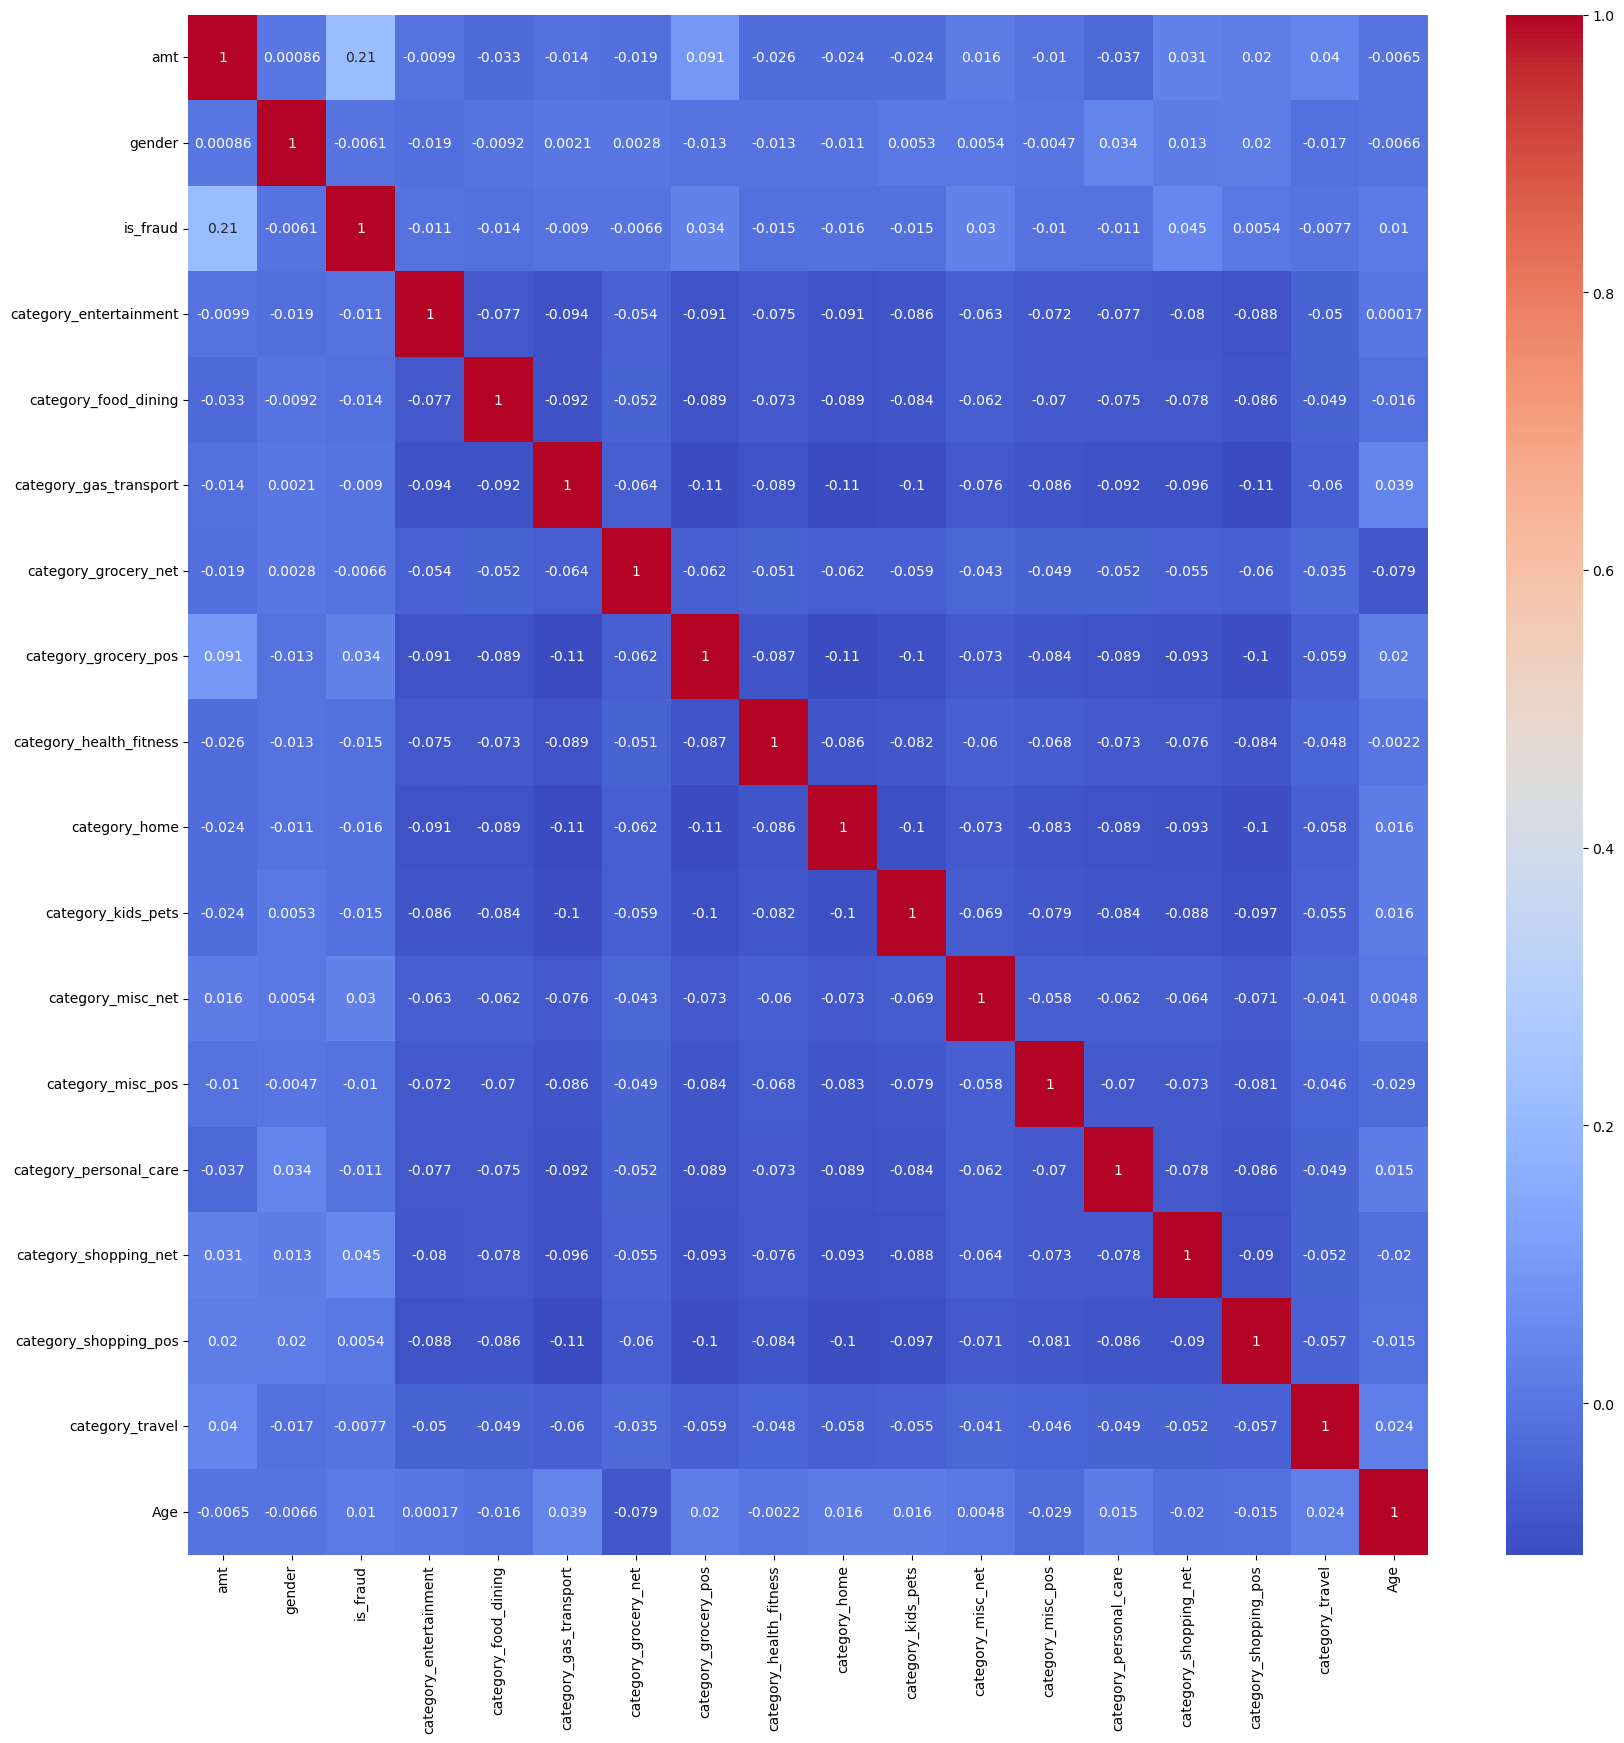

In [15]:
plt.figure(figsize=[20,20])
sns.heatmap( df_filtered.corr(),annot=True, cmap='coolwarm')